In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,t
import statsmodels as sm
import warnings
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#from sklearn.preprocessing import train
warnings.filterwarnings('ignore')

### Scenario 4: Startup's Profit Prediction
    You are provided with the '50_Startups' data. Using the given features, you have to predict the profit of
    these startups
    
    Dataset Description:
    
    The dataset contains 5 features:
    R&D Spend: Expenditures in Research and Development
    Administration: Expenditures in Administration
    Marketing Spend: Expenditures in Marketing
    State: In which state the company belongs to
    Profit: The profit made by the company
    
    Tasks to be performed:
    1. Load the data, check its shape and check for null values - Beginner
    2. Convert categorical feature to numerical values - Intermediate
    3. Split the dataset for training and testing - Beginner
    4. Perform K-Fold cross validation - Intermediate (Bridging Question)
    5. Train the model using sklearn, also find the intercept and coefficient from trained
    model - Beginner
    6. Predict the profits of test data and evaluate the model - Beginner
    7. Plot the predicted profit and actual profit from the test data with respect to R&D
    spend - Beginner

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
print(f"Shape of the data: {df.shape}")

Shape of the data: (50, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
from sklearn.preprocessing import OneHotEncoder
columns = df.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(sparse=False)
encoded_data = ohe.fit_transform(df[columns])

In [7]:
df_copy = df.copy()
df_copy.drop(columns=['State'], inplace=True)

df_encoded = pd.concat([pd.DataFrame(encoded_data), df_copy], axis=1, ignore_index=True)
df_encoded.head()

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


In [40]:
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=1)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (40, 6)
Shape of X_test: (10, 6)
Shape of y_train: (40,)
Shape of y_test: (10,)


In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [42]:
print(f"Coefficients: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")

Coefficients: [-2.85177769e+02  2.97560876e+02 -1.23831070e+01  7.74342081e-01
 -9.44369585e-03  2.89183133e-02]
Intercept: 49834.88507321703


In [43]:
lr.score(X_train, y_train)

0.942446542689397

In [44]:
lr.score(X_test, y_test)

0.9649618042060633

In [45]:
y_pred = lr.predict(X_test)

In [46]:
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.9649618042060633, 7698.119817483454, 79495441.5040725)

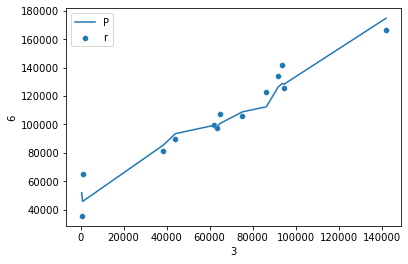

In [38]:
sns.scatterplot(x=X_test[3], y=y_test)
plt.legend('Actual')
sns.lineplot(x=X_test[3], y=y_pred)
plt.legend('Pred')
plt.show()

<AxesSubplot:xlabel='3'>

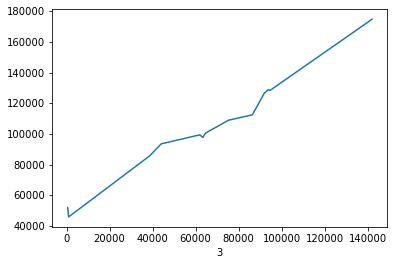

In [39]:
sns.lineplot(x=X_test[3], y=y_pred)